In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [2]:
data = pd.read_csv('thane_19_23.csv',parse_dates =["date"])
data.head()

,City,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,Eth-Benzene,MP-Xylene,O,WS,WD,SR,date,day,month,year
0,Thane,92.69,253.96,33.70,87.44,66.75,11.25,27.93,1.74,24.17,...,NaN,23.62,22.33,0.69,201.58,159.99,2019-01-01,1,1,2019
1,Thane,87.21,245.72,48.88,94.23,78.40,12.66,27.56,1.74,31.79,...,NaN,24.19,23.03,0.70,194.71,158.91,2019-02-01,2,1,2019
2,Thane,102.53,346.07,38.34,112.64,81.98,14.47,29.29,1.92,25.88,...,NaN,30.20,23.08,0.75,185.92,147.71,2019-03-01,3,1,2019
3,Thane,103.60,272.50,37.98,105.84,78.18,15.57,26.28,1.83,19.79,...,NaN,31.03,22.63,0.63,190.28,152.70,2019-04-01,4,1,2019
4,Thane,94.85,335.12,31.37,111.33,77.38,16.30,24.49,1.66,24.71,...,NaN,26.76,22.64,0.74,197.14,138.10,2019-05-01,5,1,2019


In [3]:
# drop the unwanted columns/features
cols_to_drop = ['City','Eth-Benzene']
dt = data.drop(cols_to_drop,axis=1)
# print out the info of the data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   PM2_5      186 non-null    float64       
 1   PM10       1436 non-null   float64       
 2   NO         1378 non-null   float64       
 3   NO2        1380 non-null   float64       
 4   NOx        1395 non-null   float64       
 5   NH3        1372 non-null   float64       
 6   SO2        1454 non-null   float64       
 7   CO         1452 non-null   float64       
 8   Ozone      1454 non-null   float64       
 9   Benzene    1369 non-null   float64       
 10  Toluene    1370 non-null   float64       
 11  MP-Xylene  98 non-null     float64       
 12  O          1452 non-null   float64       
 13  WS         1379 non-null   float64       
 14  WD         1383 non-null   float64       
 15  SR         1355 non-null   float64       
 16  date       1551 non-null   datetime64[ns]


In [4]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(dt.duplicated().any()))
print('The total number of null values in each colum:')
display(dt.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


PM2_5        1365
PM10          115
NO            173
NO2           171
NOx           156
NH3           179
SO2            97
CO             99
Ozone          97
Benzene       182
Toluene       181
MP-Xylene    1453
O              99
WS            172
WD            168
SR            196
date            0
day             0
month           0
year            0
dtype: int64

In [5]:
# fill in the missing values with the mean of the particular column
dt.fillna(value=dt.mean(),inplace=True)
# let's check the data again if there are any missing values
dt.isnull().any()

PM2_5        False
PM10         False
NO           False
NO2          False
NOx          False
NH3          False
SO2          False
CO           False
Ozone        False
Benzene      False
Toluene      False
MP-Xylene    False
O            False
WS           False
WD           False
SR           False
date         False
day          False
month        False
year         False
dtype: bool

In [6]:
dt.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,MP-Xylene,O,WS,WD,SR,date,day,month,year
0,92.69,253.96,33.70,87.44,66.75,11.25,27.93,1.74,24.17,24.23,140.81,23.62,22.33,0.69,201.58,159.99,2019-01-01,1,1,2019
1,87.21,245.72,48.88,94.23,78.40,12.66,27.56,1.74,31.79,23.79,138.36,24.19,23.03,0.70,194.71,158.91,2019-02-01,2,1,2019
2,102.53,346.07,38.34,112.64,81.98,14.47,29.29,1.92,25.88,30.51,193.34,30.20,23.08,0.75,185.92,147.71,2019-03-01,3,1,2019
3,103.60,272.50,37.98,105.84,78.18,15.57,26.28,1.83,19.79,24.85,140.97,31.03,22.63,0.63,190.28,152.70,2019-04-01,4,1,2019
4,94.85,335.12,31.37,111.33,77.38,16.30,24.49,1.66,24.71,23.95,138.67,26.76,22.64,0.74,197.14,138.10,2019-05-01,5,1,2019


In [7]:
def remove_outliers(df, n_std, dataset):
    """
    Removes outliers from a dataset using the z-score method.
    
    Parameters:
        data (array-like): The input dataset.
        n_std (float): The number of standard deviations from the mean to use as the threshold for identifying outliers.
    
    Returns:
        The input dataset with outliers removed.
    """
    z_scores = np.abs((df - np.mean(df)) / np.std(df))
    filtered_data = dataset[z_scores < n_std]
    return filtered_data

In [8]:
df = dt['PM2_5']
dataset = dt
data = remove_outliers(df, 3, dt)
print(data)

           PM2_5        PM10         NO         NO2        NOx        NH3  \
0      92.690000  253.960000  33.700000   87.440000  66.750000  11.250000   
1      87.210000  245.720000  48.880000   94.230000  78.400000  12.660000   
2     102.530000  346.070000  38.340000  112.640000  81.980000  14.470000   
3     103.600000  272.500000  37.980000  105.840000  78.180000  15.570000   
4      94.850000  335.120000  31.370000  111.330000  77.380000  16.300000   
...          ...         ...        ...         ...        ...        ...   
1546   68.897742  100.420000  58.390000    6.200000  37.170000   9.160000   
1547   68.897742  124.258865  45.221531   39.656638  48.325412  23.377136   
1548   68.897742  124.258865  45.221531   39.656638  48.325412  23.377136   
1549   68.897742  124.258865  45.221531   39.656638  48.325412  23.377136   
1550   68.897742  124.258865  45.221531   39.656638  48.325412  23.377136   

            SO2        CO      Ozone    Benzene     Toluene  MP-Xylene  \
0

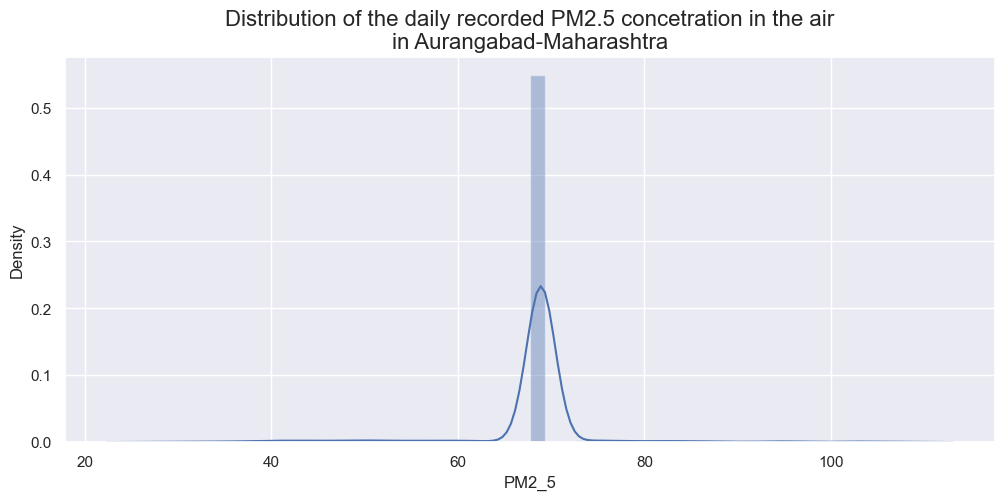

In [9]:
plt.figure(figsize=(12,5))
sns.distplot(data['PM2_5'],bins=50)
plt.title('Distribution of the daily recorded PM2.5 concetration in the air\nin Aurangabad-Maharashtra',
          fontsize=16)
plt.show()

In [10]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

# convert 'month' column to categorical variable with specified category order
monthly_data = data[['month','PM2_5']]
#monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=months, ordered=True)

# calculate monthly median of 'PM2_5'
monthly_average = monthly_data.groupby('month')['PM2_5'].median()

# round the values to one decimal place
monthly_average = np.round(monthly_average, 1)

# convert the resulting Series to a DataFrame
monthly_average = pd.DataFrame(monthly_average)

# set the index to the categorical variable and rename the column
monthly_average.index.name = 'month'
monthly_average.columns = ['median_PM2_5']

# display the resulting DataFrame
print(monthly_average)

       median_PM2_5
month              
1              68.9
2              68.9
3              68.9
4              68.9
5              68.9
6              68.9
7              68.9
8              68.9
9              68.9
10             68.9
11             68.9
12             68.9


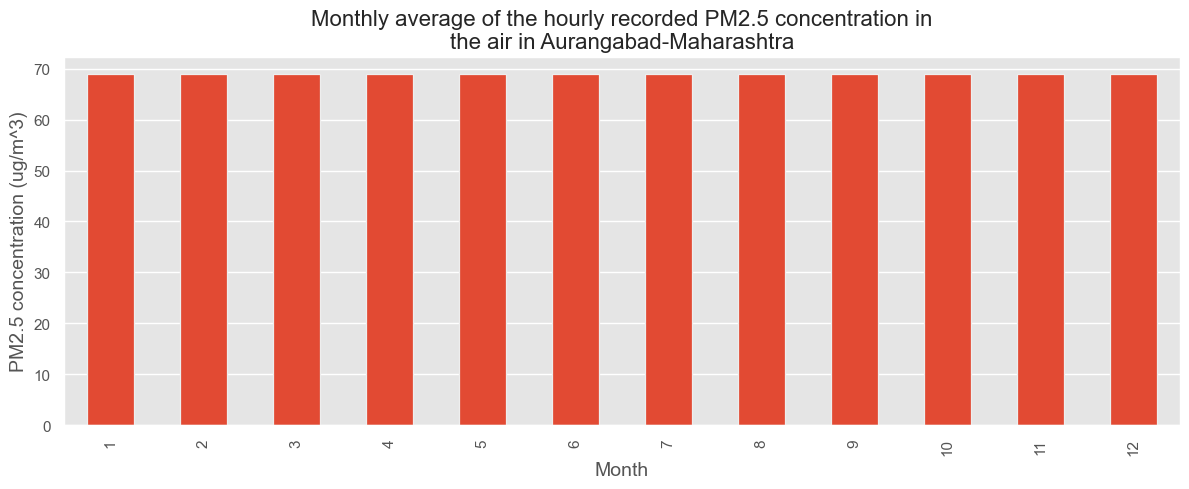

In [11]:
# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM2.5 concentration in\nthe air in Aurangabad-Maharashtra',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

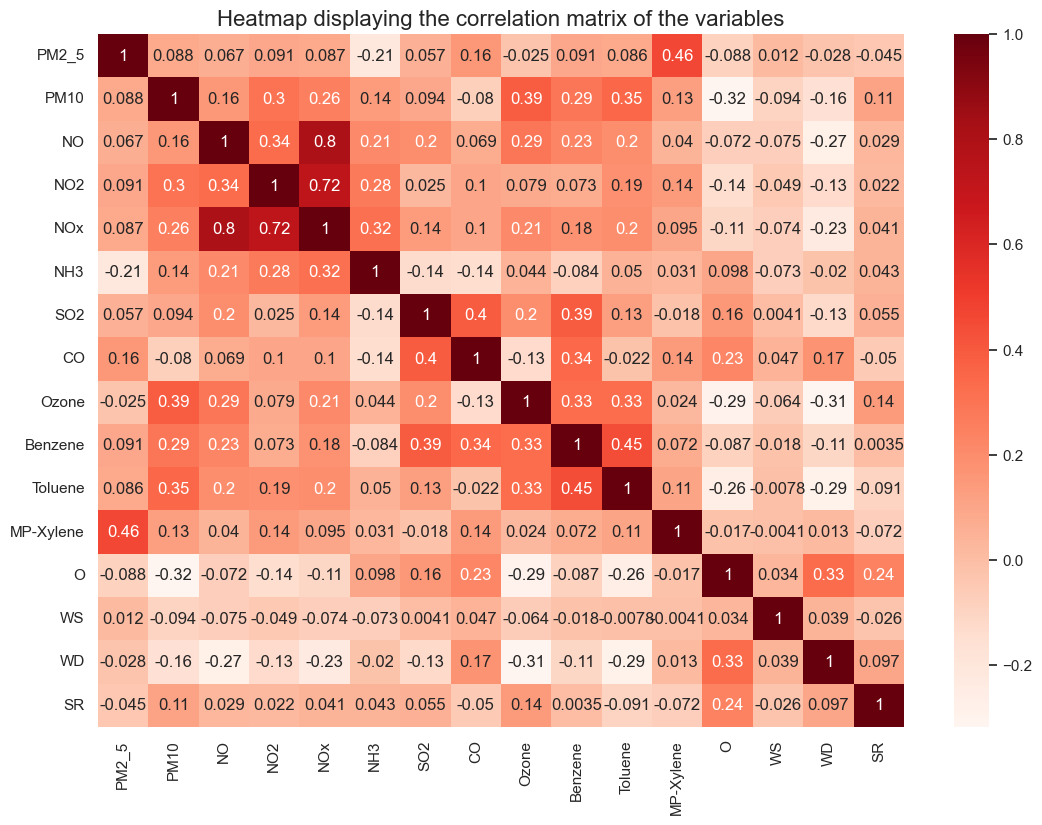

In [12]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2_5', 'PM10', 'NO', 'NO2',
                         'NOx', 'NH3', 'SO2', 'CO',
                         'Ozone', 'Benzene', 'Toluene','MP-Xylene','O','WS','WD','SR']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [13]:
cols_to_drop = ['date','year','month','day']
newdata = data.drop(cols_to_drop,axis=1)

# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const        265.434007
PM2_5          1.409692
PM10           1.529585
NO             4.552721
NO2            3.374416
NOx            8.139095
NH3            1.353295
SO2            1.502610
CO             1.600464
Ozone          1.585374
Benzene        1.773694
Toluene        1.518701
MP-Xylene      1.355541
O              1.598662
WS             1.018753
WD             1.351517
SR             1.198630
dtype: float64

In [14]:
newdata.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,MP-Xylene,O,WS,WD,SR
0,92.69,253.96,33.70,87.44,66.75,11.25,27.93,1.74,24.17,24.23,140.81,23.62,22.33,0.69,201.58,159.99
1,87.21,245.72,48.88,94.23,78.40,12.66,27.56,1.74,31.79,23.79,138.36,24.19,23.03,0.70,194.71,158.91
2,102.53,346.07,38.34,112.64,81.98,14.47,29.29,1.92,25.88,30.51,193.34,30.20,23.08,0.75,185.92,147.71
3,103.60,272.50,37.98,105.84,78.18,15.57,26.28,1.83,19.79,24.85,140.97,31.03,22.63,0.63,190.28,152.70
4,94.85,335.12,31.37,111.33,77.38,16.30,24.49,1.66,24.71,23.95,138.67,26.76,22.64,0.74,197.14,138.10


In [15]:
columns_to_drop = ['WS','WD','SR']

newdata = newdata.drop(columns_to_drop,axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after


const        246.421130
PM2_5          1.408365
PM10           1.477060
NO             4.496550
NO2            3.370937
NOx            8.126976
NH3            1.348305
SO2            1.458128
CO             1.550013
Ozone          1.504707
Benzene        1.767849
Toluene        1.460755
MP-Xylene      1.345668
O              1.361925
dtype: float64

In [16]:
newdata.columns = ['PM2_5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone','O','Benzene','Toluene','MP_Xylene']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
newdata['PM2_5'] = np.log(newdata['PM2_5'])

In [17]:
mul_reg = formula.ols(formula="PM2_5 ~ PM10  + NO + NO2 + NOx + NH3 + SO2 + CO + Ozone + O + Benzene + Toluene  + MP_Xylene",
                      data=newdata).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2_5   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     42.80
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           1.71e-87
Time:                        13:51:13   Log-Likelihood:                 1407.0
No. Observations:                1538   AIC:                            -2788.
Df Residuals:                    1525   BIC:                            -2719.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7264      0.036    104.458      0.000       3.656       3.796
PM10         1.85e-05   3.59e-05      0.516      0.606   -5.19e-05    8.89e-05
NO             0.0001      0.000      0.935      0.350      -0.000       0.000
NO2        -1.983e-05      0.000     -0.172      0.863      -0.000       0.000
NOx            0.0002      0.000      1.422      0.155   -9.01e-05       0.001
NH3           -0.0011   9.83e-05    -10.801      0.000      -0.001      -0.001
SO2            0.0001      0.000      0.673      0.501      -0.000       0.000
CO             0.0085      0.007      1.279      0.201      -0.005       0.021
Ozone         -0.0003      0.000     -3.092      0.002      -0.001      -0.000
O          -3.323e-05      0.000     -0.135      0.893      -0.001       0.000
Benzene     3.572e-05    4.8e-05      0.744      0.457   -5.84e-05       0.000
Toluene        0.0310      0.002     17.586      0.000       0.028       0.034
MP_Xylene     -0.0016      0.001     -2.331      0.020      -0.003      -0.000
==============================================================================
Omnibus:                     1163.095   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33700.000
Skew:                          -3.236   Prob(JB):                         0.00
Kurtosis:                      25.000   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# we split the data into predictor variables and Outcome variable
X = newdata.drop('PM2_5',axis=1)
y = newdata['PM2_5']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,O,Benzene,Toluene,MP_Xylene
0,1.549326,-0.268676,1.210148,0.434996,-0.424241,0.668663,2.326519,-0.584579,0.927671,1.046876,4.162663,-1.216973
1,1.451203,0.081756,1.381663,0.710131,-0.374488,0.647720,2.326519,-0.330526,0.894846,1.007656,4.554657,-1.055132
2,2.646177,-0.161561,1.846699,0.794679,-0.310620,0.745641,2.713394,-0.527567,1.396185,1.887785,8.687782,-1.043572
3,1.770101,-0.169872,1.674931,0.704936,-0.271806,0.575270,2.519956,-0.730609,0.973926,1.049437,9.258580,-1.147612
4,2.515784,-0.322465,1.813609,0.686042,-0.246047,0.473953,2.154574,-0.566575,0.906782,1.012618,6.322066,-1.145300


In [19]:
y.head()

0    4.529261
1    4.468319
2    4.630155
3    4.640537
4    4.552297
Name: PM2_5, dtype: float64

In [20]:
# we now split out data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [21]:
# we now score the model
print('Score on train data: {}\n'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}'.format(lin_model.score(X_test,y_test)))

Score on train data: 0.21702044357547656

Score on test data: 0.3161747330944673


In [22]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

Mean Squared Error: 0.009609004223740659

Overall model accuracy: 0.3161747330944673


In [23]:
ensemble_data = data.drop(cols_to_drop,axis=1)

# we split the data into predictor variables and Outcome variable
X = ensemble_data.drop('PM2_5',axis=1)
y = ensemble_data['PM2_5']

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)

In [25]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [26]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.5993995987755153

Score on test data: 0.18765701470350193

Root Mean Squared Error: 6.510078575468678

Overall model accuracy: 0.18765701470350193


In [27]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [28]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.496205637781275

Score on test data: 0.2192947231296456

Best parameters found:


{'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 6}

Root Mean Squared Error: 6.382048063357804

Overall model accuracy: 0.2192947231296456


In [29]:
dtpredicted=tree_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Decision_tree':dtpredicted.tolist()})
df.to_excel('decision_tree.xlsx')

In [30]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7)

In [31]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.6684782566955956

Score on test data: 0.4757218731312336

Root Mean Squared Error: 5.229948143195244

Overall model accuracy: 0.4757218731312336


In [32]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [33]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.6923164883745259

Score on test data: 0.48954172417941333

Best parameters found:


{'n_estimators': 400,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 7}

Root Mean Squared Error: 5.160557694172745

Overall model accuracy: 0.48954172417941333


In [34]:
rfpredicted=forest_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from random_forest':rfpredicted.tolist()})
df.to_excel('randomforest.xlsx')

In [35]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [36]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.996556881442927

Score on test data: 0.49188668439990646

Root Mean Squared Error: 5.148690678847516

Overall model accuracy: 0.49188668439990646


In [37]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [38]:
# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

Score on train data: 0.999922188843677

Score on test data: 0.5597797928459584

Best parameters found:


{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 5,
 'learning_rate': 0.2}

Root Mean Squared Error: 4.792382791761616

Overall model accuracy: 0.5597797928459584


In [39]:
xgpredicted=gboost_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Xgboost':xgpredicted.tolist()})
df.to_excel('Xgboost.xlsx')

In [40]:
xgpredicted.tolist()
print(len(y.tolist()),len(xgpredicted.tolist()))

1538 1538


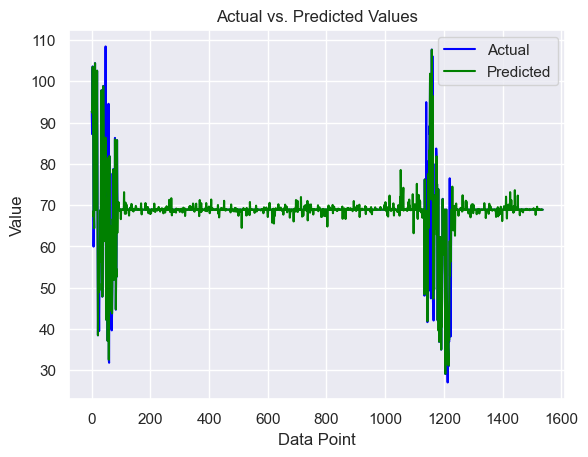

In [41]:
import matplotlib.pyplot as plt


# x-axis values (assuming 0-based indexing)
x_values = range(len(y))

# plot actual values as a blue line
plt.plot(x_values, y, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, xgpredicted, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()
